# SVM: Maximum margin separating hyperplane


Plot the maximum margin separating hyperplane within a two-class separable dataset using a Support Vector Machine classifier with linear kernel.

The objective of the support vector machine algorithm is to find a hyperplane in an N-dimensional space(N — the number of features) that distinctly classifies the data points.
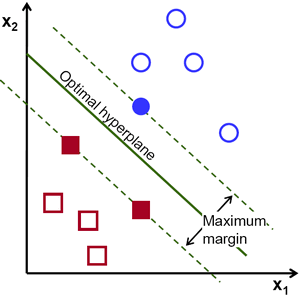

To separate the two classes of data points, there are many possible hyperplanes that could be chosen. Our objective is to find a plane that has the maximum margin, i.e the maximum distance between data points of both classes. Maximizing the margin distance provides some reinforcement so that future data points can be classified with more confidence.

$$
y(x)=\operatorname{sign}\left[w^{T} x+b\right]
$$

When the data of the two classes are separable one can say:
$$
\left\{\begin{array}{ll}
w^{T} x_{k}+b \geq+1, & \text { if } y_{k}=+1 \\
w^{T} x_{k}+b \leq-1, & \text { if } y_{k}=-1
\end{array}\right.
$$

### We will create 40 separable points that will be used to train the model. We won´t regularize for illustration purposes.

In [8]:
print(__doc__)

import numpy as np
import matplotlib.pyplot as plt
from sklearn import svm
from sklearn.datasets import make_blobs


# we create 40 separable points
X, y = make_blobs(n_samples=40, centers=2, random_state=6)


Automatically created module for IPython interactive environment


One formulates an optimization problem which expresses that one should
maximize the margin subject to the fact that all training data points need
to be correctly classified. This gives the following primal problem in w:
$$
\left[\begin{array}{rlrl}
{[\mathrm{P}:} & \min _{\boldsymbol{w}, b} J_{\mathrm{P}}(w)= & \frac{1}{2} w^{T} w \\
& & \text { such that } & y_{k}\left[w^{T} x_{k}+b\right] \geq 1, \quad k=1, \ldots, N .
\end{array}\right]
$$
### Lets plot the model

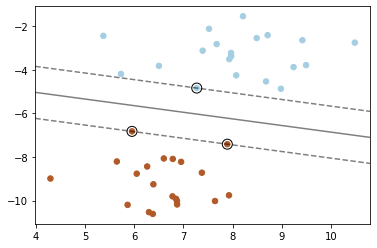

In [9]:
# fit the model, don't regularize for illustration purposes
clf = svm.SVC(kernel='linear', C=1000)
clf.fit(X, y)

plt.scatter(X[:, 0], X[:, 1], c=y, s=30, cmap=plt.cm.Paired)
# plot the decision function
ax = plt.gca()
xlim = ax.get_xlim()
ylim = ax.get_ylim()

# create grid to evaluate model
xx = np.linspace(xlim[0], xlim[1], 30)
yy = np.linspace(ylim[0], ylim[1], 30)
YY, XX = np.meshgrid(yy, xx)
xy = np.vstack([XX.ravel(), YY.ravel()]).T
Z = clf.decision_function(xy).reshape(XX.shape)

# plot decision boundary and margins
ax.contour(XX, YY, Z, colors='k', levels=[-1, 0, 1], alpha=0.5,
           linestyles=['--', '-', '--'])
# plot support vectors
ax.scatter(clf.support_vectors_[:, 0], clf.support_vectors_[:, 1], s=100,
           linewidth=1, facecolors='none', edgecolors='k')
plt.show()